In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

# Train data details 

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

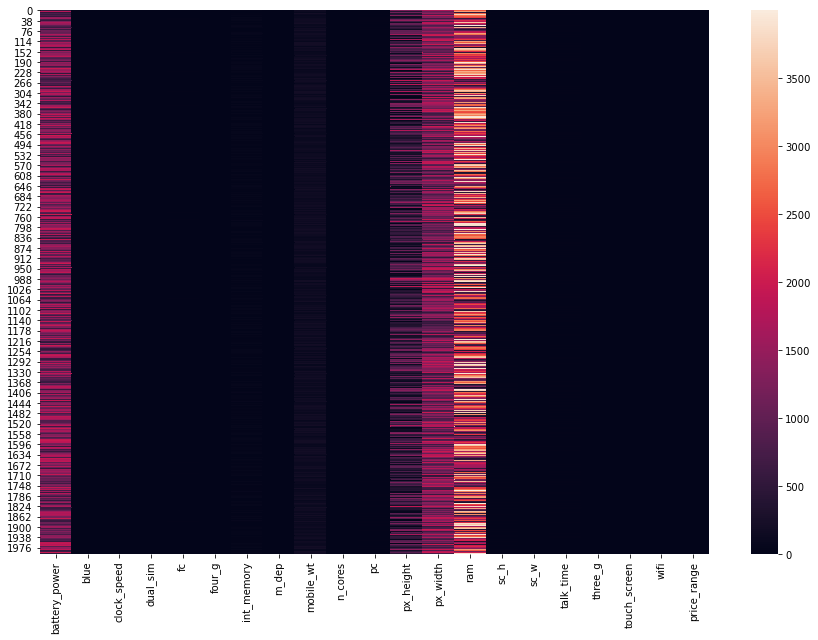

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df)

 *From this heatmap we can clearly see that mobile price depends on four columns battery_power,px_height,px_width,ram . All other factors have nearly zero correlation with the price range so we will only consider corelated factor to get best prediction model*

In [7]:
df['ram'].min()

256

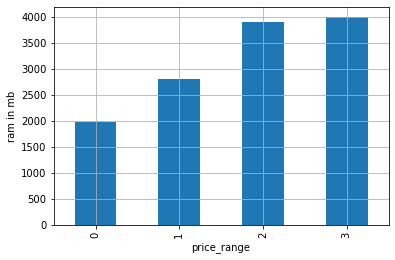

In [8]:
(df.groupby([df['price_range']])['ram'].max()).plot(kind='bar')
plt.grid()
plt.ylabel('ram in mb');

 *From this graph we can clearly see the model with high MB of ram comes under very high model catogery*

In [9]:
df['ram'].corr(df['price_range'])

0.9170457362649905

*Here we can see tha 91% of Target data is correlated with Ram feature. From this we can conclude that cost of model/mobile is maximum dependent on RAM*

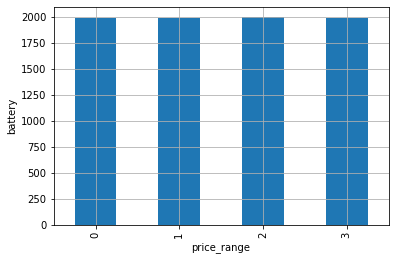

In [10]:
(df.groupby([df['price_range']])['battery_power'].max()).plot(kind='bar')
plt.grid()
plt.ylabel('battery');

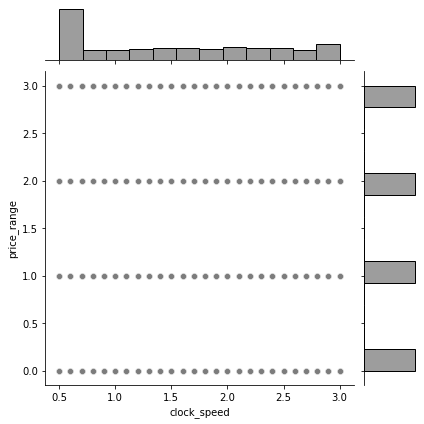

In [11]:
sns.jointplot(x = 'clock_speed', y ='price_range', data = df, color = '#7C7C7C')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


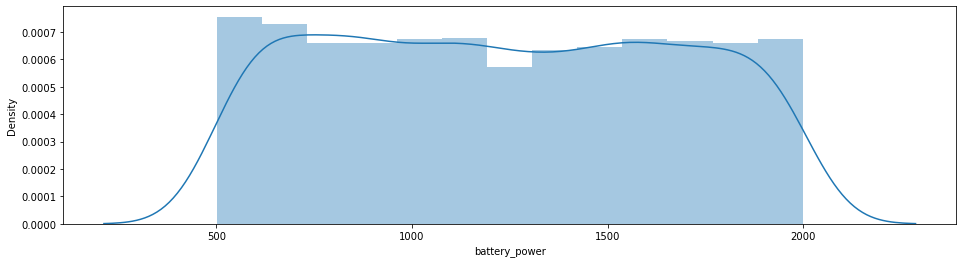

In [12]:
plt.subplots(figsize=[16,4])
sns.distplot(df['battery_power'])
plt.show()

# Data Preprocessing 

In [13]:
features = ['battery_power', 'blue', 'clock_speed','dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
            'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = ['price_range']

In [14]:
x = df[features].values
y = df[target].values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 24)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ML model 

# Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, np.ravel(y_train,order='C'))
lr.score(X_train,y_train)

0.9773333333333334

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [20]:
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[135   1   0   0]
 [  1 120   2   0]
 [  0   8 116   3]
 [  0   0   2 112]]
-------------------------------------------
Accuracy of Logistic Regression: 96.6 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       136
           1       0.93      0.98      0.95       123
           2       0.97      0.91      0.94       127
           3       0.97      0.98      0.98       114

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



# KNN Classification 

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, np.ravel(y_train,order='C'))
knn.score(X_train,y_train)

0.7

In [23]:
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))

confussion matrix
[[117  18   1   0]
 [ 26  67  29   1]
 [  0  28  66  33]
 [  0   0  22  92]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 68.4 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       136
           1       0.59      0.54      0.57       123
           2       0.56      0.52      0.54       127
           3       0.73      0.81      0.77       114

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.68       500
weighted avg       0.68      0.68      0.68       500



# Decision Tree  

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier(criterion = 'gini',random_state=0,max_depth = 6)
dt.fit(X_train, np.ravel(y_train,order='C'))
dt.score(X_train,y_train)

0.9293333333333333

In [26]:
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[124  12   0   0]
 [  6  99  18   0]
 [  0  14  98  15]
 [  0   0  18  96]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 83.39999999999999 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       136
           1       0.79      0.80      0.80       123
           2       0.73      0.77      0.75       127
           3       0.86      0.84      0.85       114

    accuracy                           0.83       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.84      0.83      0.84       500



# Random-Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,np.ravel(y_train,order='C'))
rf.score(X_train,y_train)

0.8893333333333333

In [29]:
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[124  12   0   0]
 [ 24  78  21   0]
 [  0  31  81  15]
 [  0   0  10 104]]
-------------------------------------------
Accuracy of Random Forest: 77.4 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       136
           1       0.64      0.63      0.64       123
           2       0.72      0.64      0.68       127
           3       0.87      0.91      0.89       114

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.77      0.77       500



# ML Models Summary 

In [30]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Decision Tree','Random Forest'],
                         'Accuracy': [lr_acc_score*100,knn_acc_score*100,dt_acc_score*100,rf_acc_score*100 ]})
model_ev

,Model,Accuracy
0,Logistic Regression,96.6
1,K-Nearest Neighbour,68.4
2,Decision Tree,83.4
3,Random Forest,77.4


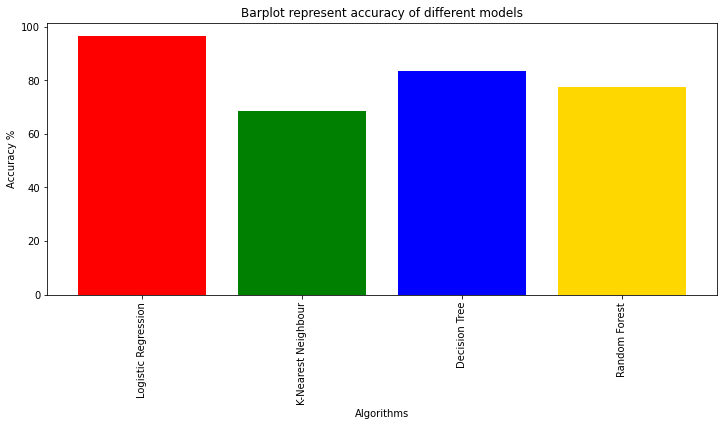

In [31]:
colors = ['red','green','blue','gold']
plt.figure(figsize=(12,5))
plt.title("Barplot represent accuracy of different models")
plt.xlabel("Algorithms")
plt.xticks(rotation=90)
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Accuracy Ranking
* Logistic Regression
* Decision Tree
* Random Forest